In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install segmentation-models

import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
import segmentation_models as sm
from keras.metrics import MeanIoU
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

     |████████████████████████████████| 50 kB 7.4 MB/s 
Segmentation Models: using `keras` framework.


In [ ]:
sm.set_framework('tf.keras')
sm.framework()

'tf.keras'

# **Pre-Processing**

In [ ]:
train_x_path = "/content/drive/MyDrive/Brain tumor/train_original/g_m_train"
train_y_path ="/content/drive/MyDrive/Brain tumor/train_mask/g_m_train"
test_x_path = "/content/drive/MyDrive/Brain tumor/test_original/g_m_test"
test_y_path = "/content/drive/MyDrive/Brain tumor/test_mask/g_m_test"
#45:13

In [ ]:
def read_images(path, i=cv2.IMREAD_COLOR):
    images_array=[]
    for items in sorted(os.listdir(path)):
        img =  cv2.imread(os.path.join(path, items), i)
        img = cv2.resize(img,(256,256))
        images_array.append(img)
    return np.array(images_array[:-1])

In [ ]:
train_x = read_images(train_x_path, i=cv2.IMREAD_COLOR)
train_y = read_images(train_y_path,i=cv2.IMREAD_GRAYSCALE)
test_x = read_images(test_x_path, i=cv2.IMREAD_COLOR)
test_y = read_images(test_y_path, i=cv2.IMREAD_GRAYSCALE)

In [ ]:
train_y = np.expand_dims(train_y, axis=3)
test_y = np.expand_dims(test_y, axis=3)

In [ ]:
print(np.shape(train_x[0]))
print(np.shape(train_y[0]))
print(np.shape(test_x[0]))
print(np.shape(test_y[0]))

(256, 256, 3)
(256, 256, 1)
(256, 256, 3)
(256, 256, 1)


In [ ]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

train_x = preprocess_input(train_x)
test_x = preprocess_input(test_x)
train_y = train_y.astype(np.float32)/255
test_y = test_y.astype(np.float32)/255

# **Loss-binary_crossentropy**

In [ ]:
model1 = sm.Unet(BACKBONE, input_shape=(256,256,3), encoder_weights='imagenet')
model1.compile('Adam', loss='binary_crossentropy', metrics=['accuracy',MeanIoU(num_classes=2)],)

model1.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_102 (ZeroPadding (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d_102[0][0]         
____________________________________________________________________________________________

In [ ]:
history1 = model1.fit(
    x=train_x,
    y=train_y,
    batch_size=20,
    verbose = 1,
    epochs=100,
    validation_data=(test_x, test_y)
    #callbacks=callbacks_list
)

Epoch 1/100
3/3 [==============================] - 6s 642ms/step - loss: 0.7022 - accuracy: 0.5972 - mean_io_u_3: 0.4937 - val_loss: 6.0330 - val_accuracy: 0.1822 - val_mean_io_u_3: 0.4991
Epoch 2/100
3/3 [==============================] - 1s 228ms/step - loss: 0.5002 - accuracy: 0.8851 - mean_io_u_3: 0.4991 - val_loss: 27.9475 - val_accuracy: 0.2129 - val_mean_io_u_3: 0.4835
Epoch 3/100
3/3 [==============================] - 1s 227ms/step - loss: 0.3959 - accuracy: 0.9596 - mean_io_u_3: 0.4883 - val_loss: 41.8198 - val_accuracy: 0.3457 - val_mean_io_u_3: 0.4779
Epoch 4/100
3/3 [==============================] - 1s 235ms/step - loss: 0.3273 - accuracy: 0.9770 - mean_io_u_3: 0.4823 - val_loss: 24.3409 - val_accuracy: 0.7657 - val_mean_io_u_3: 0.4791
Epoch 5/100
3/3 [==============================] - 1s 233ms/step - loss: 0.2686 - accuracy: 0.9821 - mean_io_u_3: 0.4821 - val_loss: 10.2627 - val_accuracy: 0.8328 - val_mean_io_u_3: 0.4806
Epoch 6/100
3/3 [==============================] - 

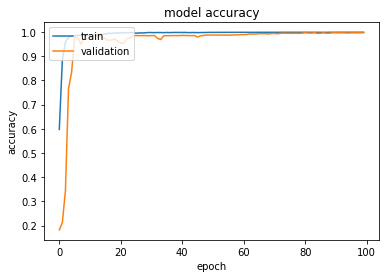

In [ ]:
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

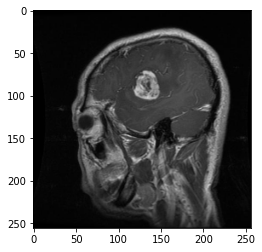

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/Brain tumor/validate/validate/gg (269).jpg', cv2.IMREAD_COLOR) 
test_img = cv2.resize(img, (256,256))
test_img = cv2.cvtColor(test_img, cv2.IMREAD_COLOR)
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)
prediction = model1.predict(test_img)

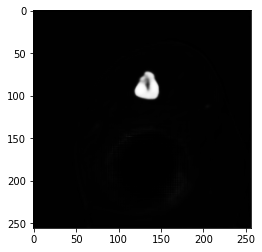

In [ ]:
prediction_image = prediction.reshape((256,256))
plt.imshow(prediction_image, cmap='gray')

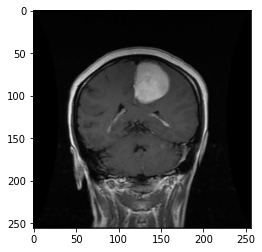

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/Brain tumor/validate/validate/m (24).jpg', cv2.IMREAD_COLOR) 
test_img = cv2.resize(img, (256,256))
test_img = cv2.cvtColor(test_img, cv2.IMREAD_COLOR)
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)

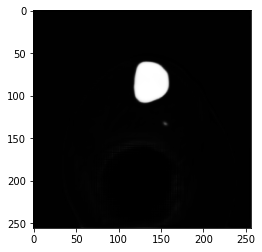

In [ ]:
prediction = model1.predict(test_img)
prediction_image = prediction.reshape((256,256))
plt.imshow(prediction_image, cmap='gray')

# **Loss-bce_jaccard_loss**https://drive.google.com/file/d/1LX9wmINj5yuo_biN-NNqw3YCft1c7gIl/view?usp=sharing

In [ ]:
model = sm.Unet(BACKBONE, input_shape=(256,256,3), encoder_weights='imagenet')
model.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=['accuracy',MeanIoU(num_classes=2)],)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_68 (ZeroPadding2 (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d_68[0][0]          
____________________________________________________________________________________________

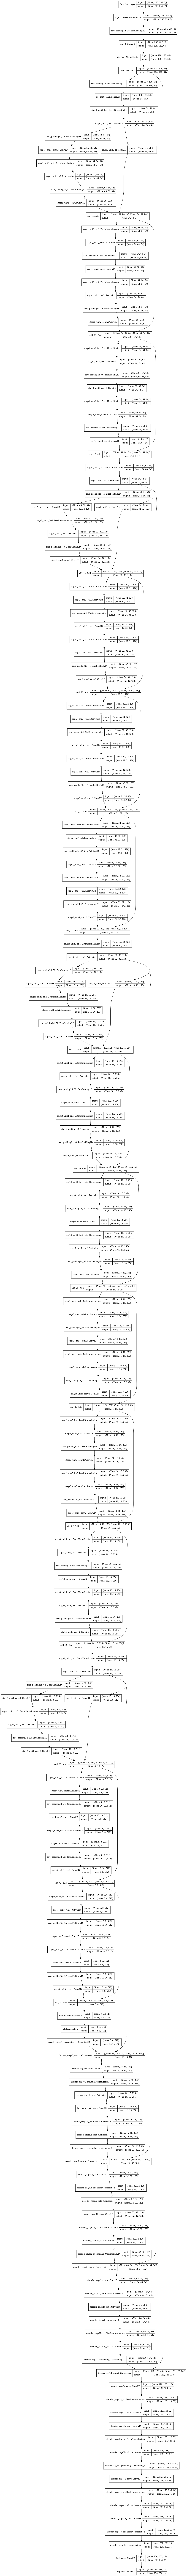

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
history = model.fit(
    x=train_x,
    y=train_y,
    batch_size=20,
    verbose = 1,
    epochs=100,
    validation_data=(test_x, test_y)
    #callbacks=callbacks_list
)

Epoch 1/100
3/3 [==============================] - 6s 632ms/step - loss: 1.7747 - accuracy: 0.5278 - mean_io_u_2: 0.4931 - val_loss: 38.9212 - val_accuracy: 0.0299 - val_mean_io_u_2: 0.4529
Epoch 2/100
3/3 [==============================] - 1s 227ms/step - loss: 1.5867 - accuracy: 0.8707 - mean_io_u_2: 0.4718 - val_loss: 111.4148 - val_accuracy: 0.0334 - val_mean_io_u_2: 0.4510
Epoch 3/100
3/3 [==============================] - 1s 222ms/step - loss: 1.4490 - accuracy: 0.9666 - mean_io_u_2: 0.4632 - val_loss: 84.0585 - val_accuracy: 0.1533 - val_mean_io_u_2: 0.4553
Epoch 4/100
3/3 [==============================] - 1s 228ms/step - loss: 1.3732 - accuracy: 0.9757 - mean_io_u_2: 0.4636 - val_loss: 19.9352 - val_accuracy: 0.6909 - val_mean_io_u_2: 0.4649
Epoch 5/100
3/3 [==============================] - 1s 223ms/step - loss: 1.3158 - accuracy: 0.9796 - mean_io_u_2: 0.4702 - val_loss: 8.8794 - val_accuracy: 0.9441 - val_mean_io_u_2: 0.4727
Epoch 6/100
3/3 [==============================] -

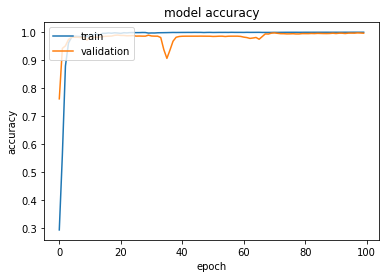

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

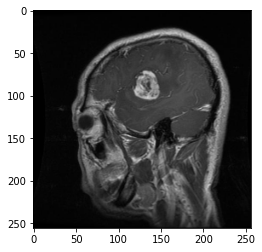

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/Brain tumor/validate/validate/gg (269).jpg', cv2.IMREAD_COLOR) 
test_img = cv2.resize(img, (256,256))
test_img = cv2.cvtColor(test_img, cv2.IMREAD_COLOR)
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)

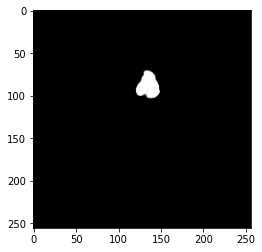

In [ ]:
prediction_image = prediction.reshape((256,256))
plt.imshow(prediction_image, cmap='gray')

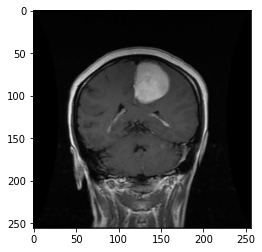

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/Brain tumor/validate/validate/m (24).jpg', cv2.IMREAD_COLOR) 
test_img = cv2.resize(img, (256,256))
test_img = cv2.cvtColor(test_img, cv2.IMREAD_COLOR)
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)

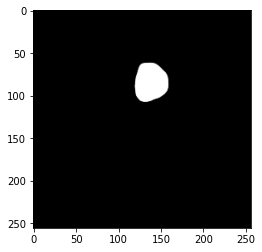

In [ ]:
prediction = model.predict(test_img)
prediction_image = prediction.reshape((256,256))
plt.imshow(prediction_image, cmap='gray')

In [ ]:
model.save_weights('/content/drive/MyDrive/Brain tumor/model/brain_g_m.h5')